# Learning ggplot2 

This notebook covers Data Visualization using the **ggplot2** package from **tidyverse**.

To install `ggplot`, 
1. Open an R console
2. Enter `install.packages("tidyverse")`
3. Select a mirror, and begin installation

## Graph components in `ggplot`

A graph is divided into _three_ main components, viz.,
1. **Data**: the data table used for the graphs
2. **Geometry**: refers to the plot of the graph (scatter plot, boxplot, q-q plot, histogram, etc.)
3. **Aesthetic Mapping**: x-axis values, y-axis values, text, colors, etc

Furthermore, there are two more components, viz.,
1. **Scale**: like log scales, etc
2. **Other components**: like legends, title, labels, etc

## Utility functions

Defining all the utility functions required for this notebook.

In [355]:
randomColors = function(numberOfColors = 1) {
    # Return a vector containing a number of random colors, all in "#rrggbb" format
    
    cols = c() # empty vector of colors
    for (i in 1:numberOfColors) {
        r = as.character(as.hexmode(sample(0:255, 1))) # amount of red
        if (nchar(r) == 1) r = paste("0", r, sep = "")
        
        g = as.character(as.hexmode(sample(0:255, 1))) # amount of green
        if (nchar(g) == 1) r = paste("0", r, sep = "")
        
        b = as.character(as.hexmode(sample(0:255, 1))) # amount of blue
        if (nchar(b) == 1) r = paste("0", r, sep = "")
        
        col = paste("#", r,g,b, sep="") # current random color
        
        if (nchar(col) != 7) col = "#ff0000" # safe side
        
        cols = append(cols, col) # append the current color to the list of colors
    }
    cols
}

In [356]:
# Test the utility functions
randomColors(100)
randomColor()

[1] "#69fca1" "#fd7b1b" "#6a3fee" "#069c42" "#87b33d" "#07ff6c" "#f0a5a2"
  [8] "#0bec94" "#105e17" "#35365f" "#40882f" "#4adaf4" "#043bad" "#a64c6d"
 [15] "#09cf57" "#443e90" "#4a22bf" "#766e3b" "#ffea25" "#a42158" "#e3299c"
 [22] "#dc4f9b" "#a55098" "#b75a54" "#fe41d9" "#29abc0" "#f7607c" "#96951d"
 [29] "#7ae4af" "#0b8ebb" "#d06250" "#002572" "#99d252" "#051387" "#b191e0"
 [36] "#b0a7ec" "#6ca616" "#075f66" "#e2aa43" "#6e6fb8" "#2f2b25" "#010613"
 [43] "#e963f1" "#34cccc" "#b54cc1" "#63ef60" "#428bbc" "#443c88" "#05b825"
 [50] "#213a5c" "#2dc97b" "#7df8dc" "#439d26" "#3d66f3" "#0dd2a3" "#8116cf"
 [57] "#697ebf" "#346968" "#451e8e" "#e176e7" "#0bfb3b" "#069d5b" "#bff05b"
 [64] "#b87811" "#9e5c83" "#0a7220" "#cdeb83" "#781587" "#7bb27a" "#205b8b"
 [71] "#a16f6a" "#3ed823" "#cfbd35" "#0c2383" "#16f04e" "#edd41b" "#d94f7c"
 [78] "#fa69e4" "#715b7f" "#da32fe" "#f07f21" "#af9188" "#0e4411" "#aa5daa"
 [85] "#03f374" "#f0daed" "#a557eb" "#176ee2" "#1aa010" "#e49993" "#ca4efc"
 [92] "#04716f" "#d32e86" "#5f3353" "#608f62" "#0c8513" "#e39f9e" "#417852"
 [99] "#7cf481" "#e8cc9e"

[1] "#47c44"

## Load dependencies

In [382]:
library(ggplot2) # contains the graph tools
library(dslabs) # contains our working dataset
library(dplyr) # contains some dataset tools
library(ggthemes) # contained the theme for our graph
library(ggrepel) # contains function to position the point labels isolated from one another
library(gridExtra) # to show graphs next to each other
data(murders) # the dataset for producing scatter plot
data(heights) # the dataset for producing histogram


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [299]:
head(murders)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [6]:
str(murders)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...


In [300]:
head(heights)

sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


In [301]:
str(heights)

'data.frame':	1050 obs. of  2 variables:
 $ sex   : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 1 1 1 2 ...
 $ height: num  75 70 68 74 61 65 66 62 66 67 ...


## Creating scatter-plot with `ggplot()`

This is where the plot gets created.

Some points to note.
1. `plt = ggplot(data = dataset)` creates an empty plot from the dataset, and stores it to object `plt`.
2. Add layers to this plot one by one, as you add details to the graph.
3. The `aes` function adds aesthetic mappings to the graph, such as the axes, the point labels, and the point colors belonging to its factor object.
4. The `geom_abline` function adds a best-fit line to the graph points. For the line intercept, we define a relation between rate `r`. the predictor `x` and the outcome `y` as follows.
    `y = r * x`
    The `r` is defined using the `summarize` function from the `dplyr` package.
5. **The `geom_point` function adds a scatter plot to the graph.**
6. The `geom_text_repel` writes the point labels in the graph more clearly and legibly. This function is drawn from the `ggrepel` package.
7. The theme used here is taken from the `ggthemes` package.

Keeping these points in mind, the following chunk of code creates the desired graph.

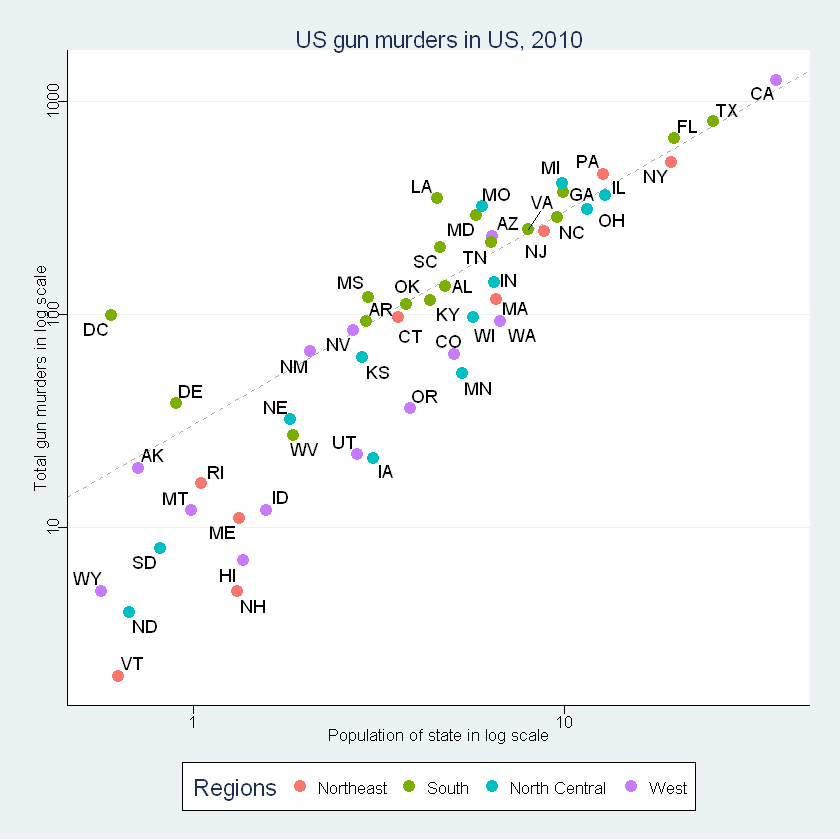

In [295]:
# Create a graph from the murders dataset, using the ggplot() function, with some common layers
plt = ggplot(data = murders, aes(x = population / (10^6), y = total, label = abb))
# plt = murders %>% ggplot() # another way to do it (supply the arguments inside parentheses (...))

# Now add the first extra layer: the geometry
# In order to create a scatter plot, use geom_point function

# We need a line passing through the plot points
# For this, use: y = r * x (where r is the murder rate)
r = murders %>% summarize(rate = sum(total) / sum(population) * 10^6) %>% .$rate
plt = plt + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey")

# plt = plt + geom_point (colour = c(randomColors(51)), size = 3) # uncomment to assign each state a different color (but the legend goes away)
plt = plt + geom_point (aes (col = region), size = 3)

# Add more layers, namely, labels for each state
# plt = plt + geom_text(nudge_x = 0.08) # replace geom_text by geom_label to put the labels in rectangular boxes
plt = plt + geom_text_repel ()

plt = plt + scale_x_log10() + scale_y_log10() # log10 scales are the desried scales

# lables for the axes, and title
plt = plt + xlab ("Population of state in log scale") + ylab("Total gun murders in log scale") + ggtitle("US gun murders in US, 2010")

# Add the legend
plt = plt + scale_color_discrete(name = "Regions")

# Finally, add the theme
plt = plt + theme_stata()

print(plt)

## Create histograms with `ggplot()`

**Aim.** Create a histogram showing the frequencies of male heights, with bin-size as 1.

**The `geom_histogram` function adds a histogram layer to the plot.**

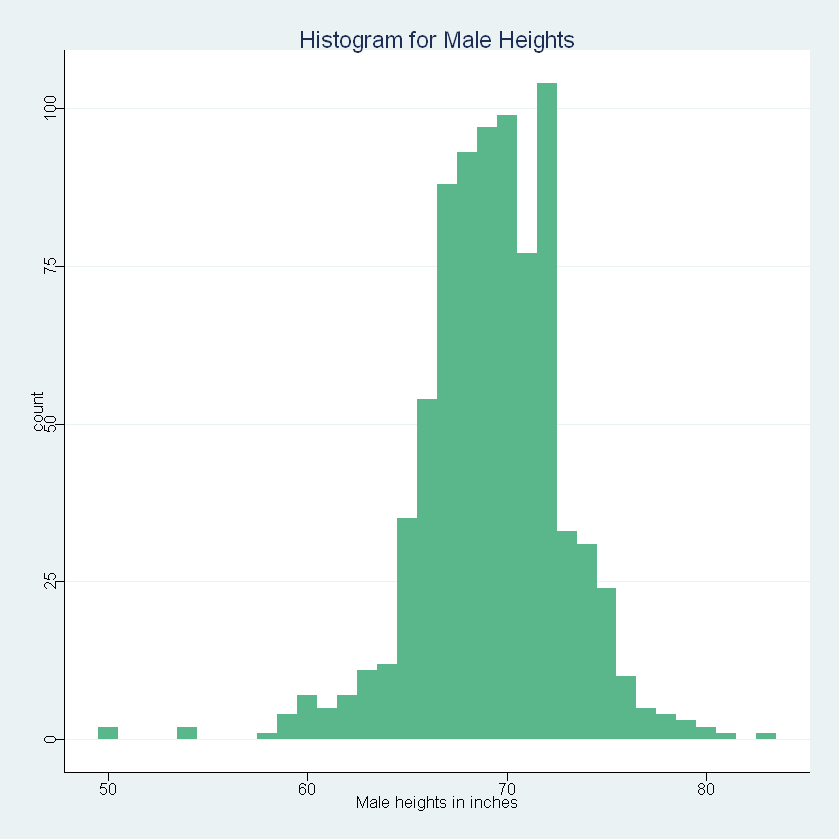

In [359]:
# Create the empty plot
hist = ggplot (data = filter(heights, sex == "Male"), aes(x = height))

# Add a histograph to it
hist = hist + geom_histogram(binwidth = 1, fill = randomColors(1))

# Add label, title and theme
hist = hist + xlab("Male heights in inches") + ggtitle("Histogram for Male Heights") + theme_stata()
print(hist)

## Create a smooth-density curve with `ggplot()`

**Aim.** Create a smooth-density curve for female heights using the `geom_density` function.

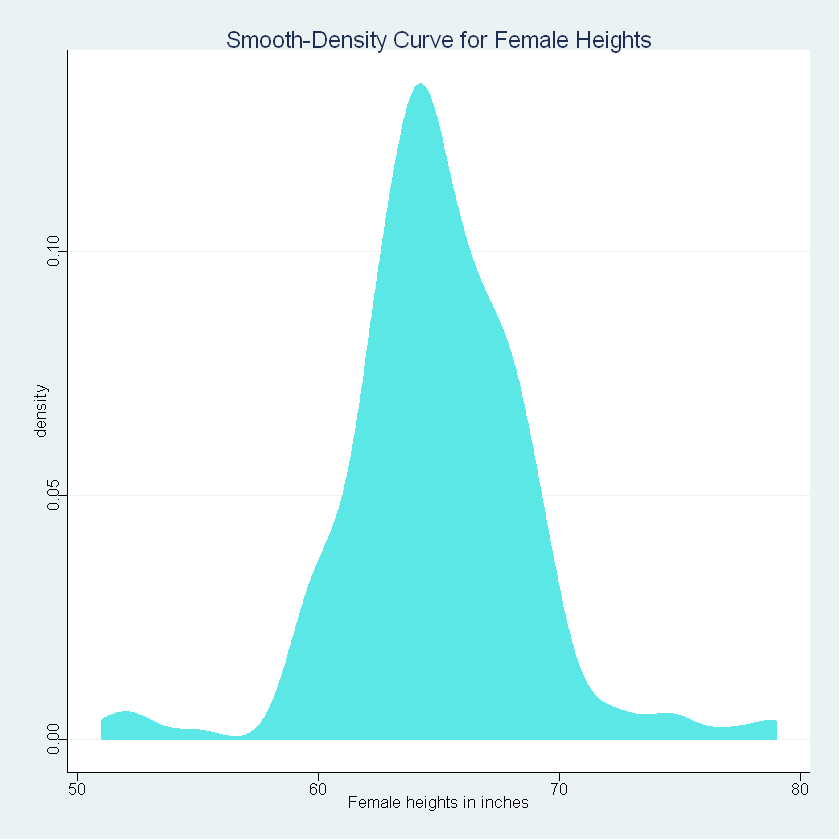

In [360]:
# Create the empty plot
dens = ggplot (data = filter(heights, sex == "Female"), aes(x = height))

# Add a smooth-density curve to it
col = randomColors(1)
dens = dens + geom_density(fill = col, color = col)

# Add title, label, and theme
dens = dens + xlab("Female heights in inches") + ggtitle("Smooth-Density Curve for Female Heights") + theme_stata()
print (dens)

## Create a q-q plot using `ggplot()`

**Aim.** Create a q-q plot for male and female heights using `geom_qq` function, and show them next to each other.

**Point to note.** In the aesthetics function `aes`, replace `x` by `sample`.

In [432]:
# Create the empty plot for males
qq_male = ggplot (data = filter(heights, sex == "Male"), aes(sample = height)) # use scale(height for standard units)

# Add the q-q plot geometry layer
# qq_male = qq_male + geom_qq() # uncomment to create the default q-q plot, but that's not what's desired

# By default, geom_qq() contains a plot with mean = 0 and SD = 1.
# To change this, create an object with the correct parameters
params = summarize(filter(heights, sex == "Male"), mean = mean(height), sd = sd(height))

# Now add these parameters to the plot
qq_male = qq_male + geom_qq(dparams = params, color = randomColor())

# Add an identity line, title, and theme
qq_male = qq_male + geom_abline() + ggtitle("Quantile-Quantile Plot for Male heights") + theme_stata()

In [433]:
# Now do the same for females
qq_female = ggplot (data = filter(heights, sex == "Female"), aes(sample = scale(height))) # using standard units here
qq_female = qq_female + geom_qq(color = randomColors())
qq_female = qq_female + geom_abline() + ggtitle("Quantile-Quantile Plot for Female heights") + theme_stata()

# As we're using standard units for females, we don't need to recompute mean and sd

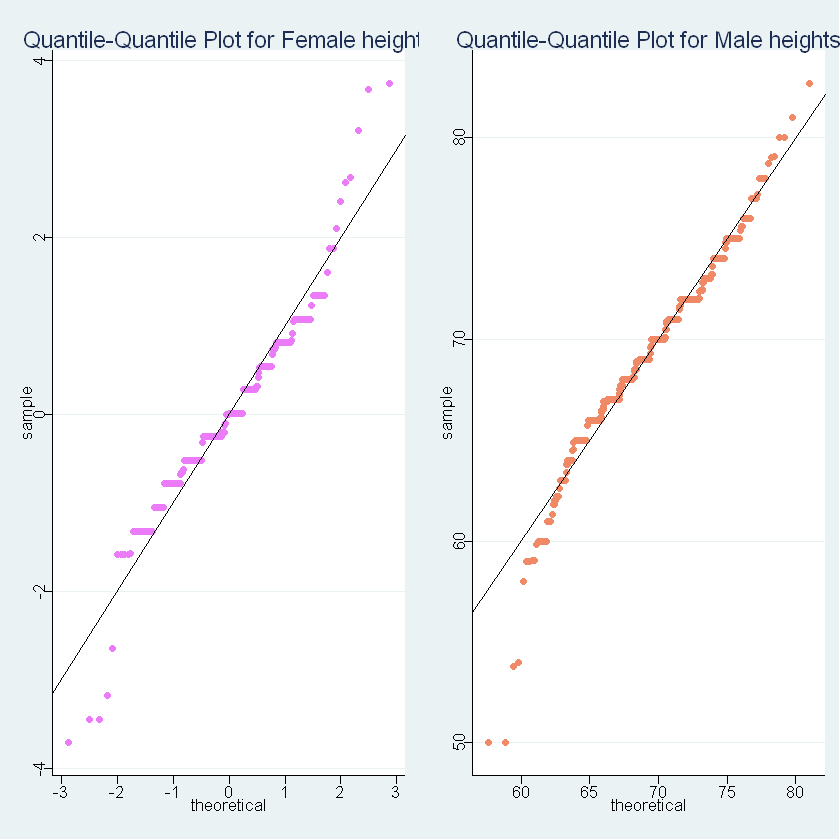

In [434]:
# Finally, show them next to each other
grid.arrange(qq_female, qq_male, ncol = 2)